In [4]:
import galsim
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import Uniform, Beta, Normal
import pyccl
# import torch

In [2]:
dist = Normal(torch.tensor([0.8159]), torch.tensor([0.001]))
sigma_8 = dist.sample().item()
print(sigma_8)

0.8161540031433105


In [5]:
# cosmology = pyccl.cosmology.Cosmology(sigma8=sigma_8,
#                                       Omega_c=0.25,
#                                       Omega_b=0.0486,
#                                       h=67.7, # order of magnitude is wrong
#                                       n_s=1,
# )
cosmology = pyccl.cosmology.CosmologyVanillaLCDM()

In [6]:
cosmology.compute_linear_power()
power_spectrum = cosmology.get_linear_power()

In [7]:
print(power_spectrum)

<pyccl.pk2d.Pk2D>
	+==============+=================================================================+
	| a \ log10(k) | -4.30e+00 -4.16e+00 -4.01e+00 ...  8.37e-01  9.29e-01  1.02e+00 |
	+==============+=================================================================+
	|  1.00e-02    |  1.84e-01  2.53e-01  3.49e-01 ...  1.09e-04  6.25e-05  3.56e-05 |
	|  1.26e-02    |  2.98e-01  4.11e-01  5.66e-01 ...  1.72e-04  9.82e-05  5.59e-05 |
	|  1.58e-02    |  4.82e-01  6.64e-01  9.14e-01 ...  2.71e-04  1.55e-04  8.81e-05 |
	|     ...      |                               ...                               |
	|  9.54e-01    |  1.19e+03  1.64e+03  2.26e+03 ...  6.06e-01  3.46e-01  1.97e-01 |
	|  9.77e-01    |  1.22e+03  1.68e+03  2.32e+03 ...  6.22e-01  3.55e-01  2.02e-01 |
	|  1.00e+00    |  1.25e+03  1.73e+03  2.38e+03 ...  6.37e-01  3.64e-01  2.07e-01 |
	+==============+=================================================================+
	| is_log = True , extrap_orders = (1, 2)                 

In [27]:
# power_spectrum.get_spline_arrays[2] returns P(k, a), but we want k for a fixed a

power_spectrum_vals_pk = power_spectrum.get_spline_arrays()[2][0]
power_spectrum_vals_k = np.exp(power_spectrum.get_spline_arrays()[1])

power_spectrum_vals_pk = np.array([power_spectrum_vals_pk]).T
power_spectrum_vals_k = np.array([power_spectrum_vals_k]).T
print(power_spectrum_vals_pk.shape)

with open('./sample_ps_vals.txt', 'w') as f:
    print(power_spectrum_vals_k.shape, power_spectrum_vals_pk.shape)
    x = np.hstack((power_spectrum_vals_k, power_spectrum_vals_pk))
    print(x.shape)
    np.savetxt(f, x)

(193, 1)
(193, 1) (193, 1)
(193, 2)


In [28]:
lookup = galsim.LookupTable(x=power_spectrum_vals_k, f=power_spectrum_vals_pk, x_log=False, f_log=False)

In [32]:
galsim_ps = galsim.PowerSpectrum(lookup, units=galsim.megaparsecs)

AttributeError: module 'galsim' has no attribute 'megaparsecs'

[[-0.01304533 -0.0071632   0.03646001  0.02982726 -0.01106775  0.03783289
   0.07399546 -0.06162    -0.11838782 -0.05166791 -0.06037739 -0.12001942
  -0.11881912 -0.10102937 -0.13584369 -0.02302954  0.02001953 -0.04962233
  -0.04986112 -0.0304356 ]
 [-0.07932569 -0.0845991  -0.00959946  0.05147901  0.0254158   0.04586127
   0.05887111 -0.02971559 -0.0697657   0.01864924  0.0060788  -0.09293778
  -0.0864997  -0.11427855 -0.09704248  0.01819811 -0.00222672 -0.00936688
  -0.01260119 -0.06998497]
 [-0.01361281 -0.02164229  0.00312194 -0.03344436 -0.03572004  0.04330715
   0.03460594  0.02779772  0.00046113  0.00264051  0.03099731 -0.02915795
  -0.07946194 -0.11246291 -0.06159711  0.03389991  0.01993795 -0.00117938
  -0.01603732 -0.02706333]
 [-0.0126045  -0.00671553  0.01058514 -0.02598866  0.0008321   0.04245213
   0.02041418  0.06069601  0.08493083  0.06427212  0.05728127 -0.02207342
  -0.09075161 -0.0333129   0.00141084  0.05677154  0.05721239 -0.02802752
  -0.06621911 -0.04498224]
 [ 0

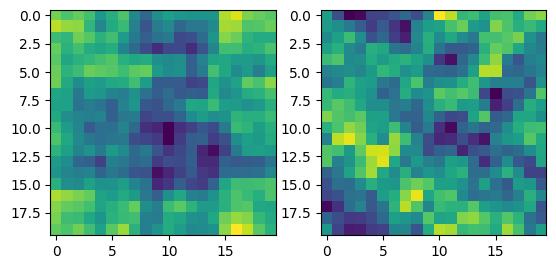

In [31]:
grid_size = 10.  # Define the total grid extent, in degrees
ngrid = 20      # Define the number of grid points in each dimension: (ngrid x ngrid)
n_ell = 15  

g1, g2, kappa = galsim_ps.buildGrid(grid_spacing=grid_size/ngrid, ngrid=ngrid, units=galsim.degrees, get_convergence=True)

fig, (one, two) = plt.subplots(nrows=1,ncols=2)
_ = one.imshow(g1)
_ = two.imshow(g2)
print(kappa)